planetoplot: branch python3_rebase, commit dd2387b6dfa03be86a64d95f8febfda2bf9387ad

In [1]:
import numpy as np
from ppclass import pp
%matplotlib inline

/home/aspiga/soft/planetoplot/modules/ppplot.py:33: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  mpl.rcParams['verbose.level'] = "silent"


In [2]:
ini = pp(quiet=True)
ini.useindex = "1111"
ini.colorbar = "seismic"
ini.res = 600
ini.title = "" #None for default
#ini.xp,ini.yp = 4,3 ## vignettes for quick views

In [3]:
ini.file = "/media/aspiga/2815-53F5/TITANLES50m/wrfout_d01_9999-01-05_15-06-40_ind70_to_90"
ini.folder = "TITANLES50m_irene"
dx = 50. # meters
ini.t = 8
ind_dd = 99

In [4]:
ini.file = "/media/aspiga/2815-53F5/TITANLES100m/wrfout_d01_9999-01-07_22_red"
ini.folder = "TITANLES100m"
dx = 100. # meters
ini.t = 0
ind_dd = 45

In [5]:
time_end = 20
time_interv = str(ini.t)+","+str(time_end)

## Vertical section

In [6]:
### WE GET THE ALTITUDE AXIS FROM GEOPOTENTIAL
phtot = pp() ; phtot << ini ; phtot.x = 0 ; phtot.y = 0 ; phtot.t = 0
phtot.var = "PHTOT"
zzz = np.array(phtot.getf()/1.35)
### substract ~ground geopotential
zzz = zzz - zzz[0]
### fix last level
zzz[-1] = zzz[-2]+(zzz[-2]-zzz[-3])

In [7]:
ver = pp() ; ver << ini
ver.x = 50
ver.xcoeff = dx/1000. ; ver.xlabel = "Horizontal coordinate (km)" ; ver.nxticks = 15
ver.ycoeff = 1./1000. ; ver.ylabel = "Vertical coordinate (km)" ; ver.nyticks = 20
ver.filename = "vertsec"
ver.xp,ver.yp = 14,6

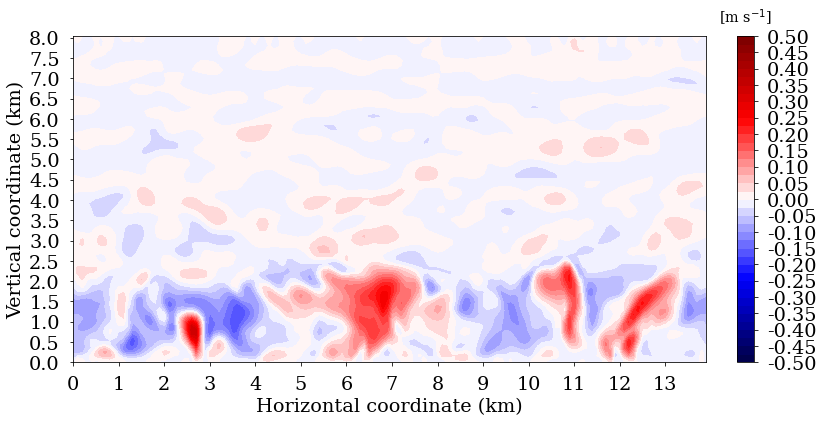

**** Saving file in png format... Please wait.


pp object. "help(pp)" for more information

In [8]:
w = pp() ; w << ver ; w.var = "W" #; w.verbose = True
w.vmin,w.vmax,w.div,w.fmt = -0.5,+0.5,40,"%.2f"
foo = w.getdefineplot() 
##############################
#### change vertical axis ####
w.p[0].y = zzz ; w.makeplot() 
##############################
w.out = "png" ; w.filename = w.filename+w.var[0] #; foo = w.plot()
foo = w.defineplot() ; w.p[0].y = zzz ; w.makeplot()

Below we create a movie of turbulent convection

In [9]:
if 1 == 1:
    for ttt in range(time_end):
        w.t = ttt
        w.out = "png"
        w.filename = "W%03d" % (ttt)
        w.getdefineplot()
        w.p[0].y = zzz
        w.makeplot()
    #!mencoder -mc 0 -noskip -skiplimit 0 -ovc lavc -lavcopts vcodec=msmpeg4v2:vhq "mf://*.png" -mf type=png:fps=18 -o output.avi > output.log 2>&1

**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.
**** Saving file in png format... Please wait.


## Horizontal section
### Surface diagnostics

In [10]:
hor = pp() ; hor << ini

hor.xcoeff = dx/1000.
hor.xlabel = "Horizontal coordinate (km)"
hor.nxticks = 15

hor.ycoeff = dx/1000.
hor.ylabel = "Horizontal coordinate (km)"
hor.nyticks = 15

hor.filename = "horimap"
hor.xp,hor.yp = 14,12

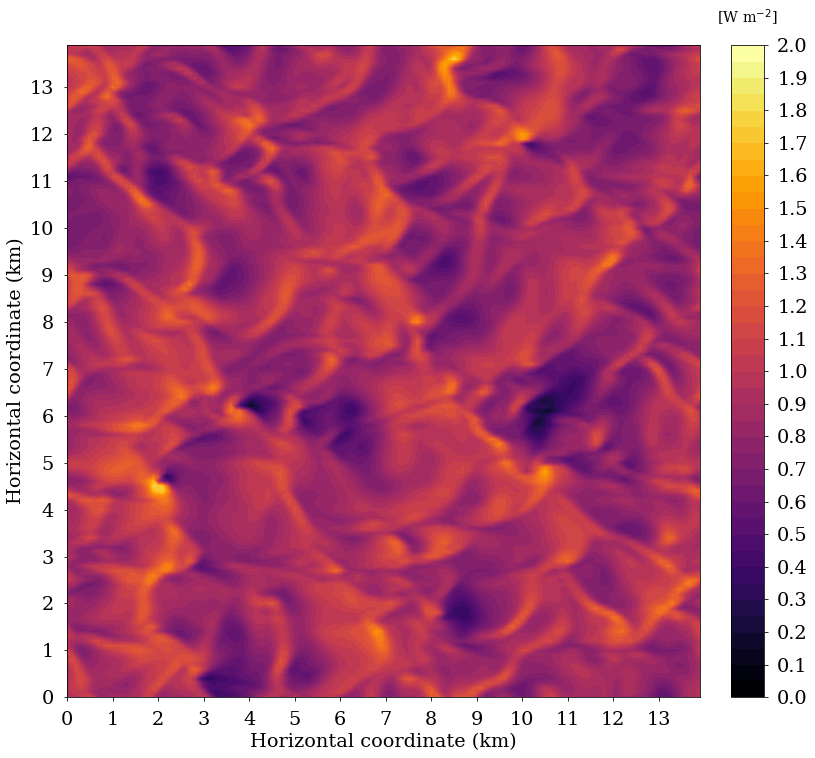

**** Saving file in png format... Please wait.


In [11]:
mp = pp() ; mp << hor ; mp.var = "HFX" 
mp.get() 
mp.colorbar = "inferno" 
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = 0,2,40,"%.1f","W m$^{-2}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.vmin) ; foo = mp.plot()

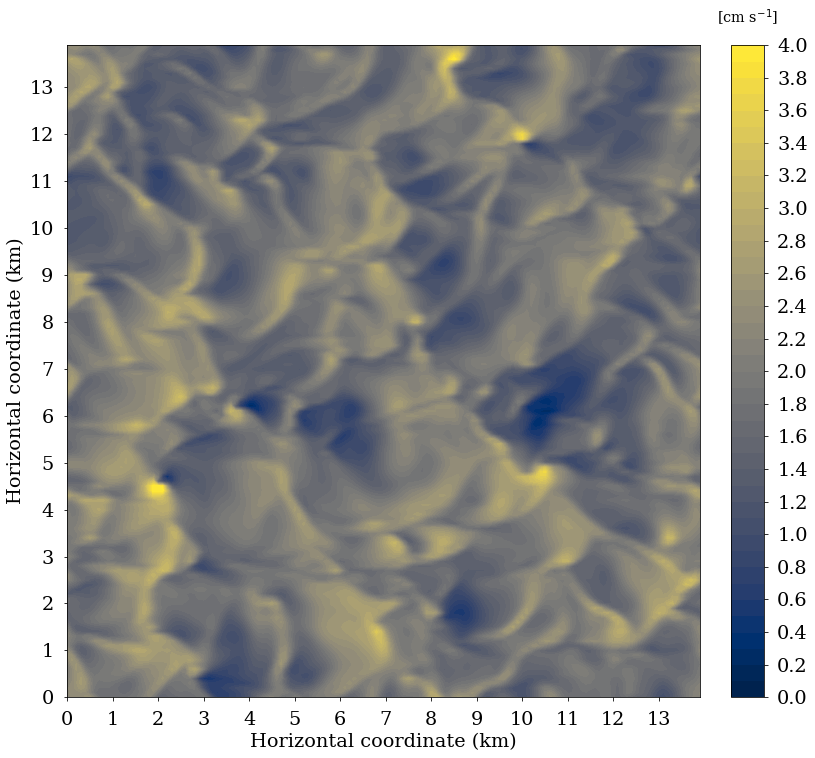

**** Saving file in png format... Please wait.


In [12]:
mp = pp() ; mp << hor ; mp.var = "USTM" 
mp.get() 
mp = mp*100.
mp.colorbar = "cividis" 
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = 0,4,40,"%.1f","cm s$^{-1}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.vmin) ; foo = mp.plot()

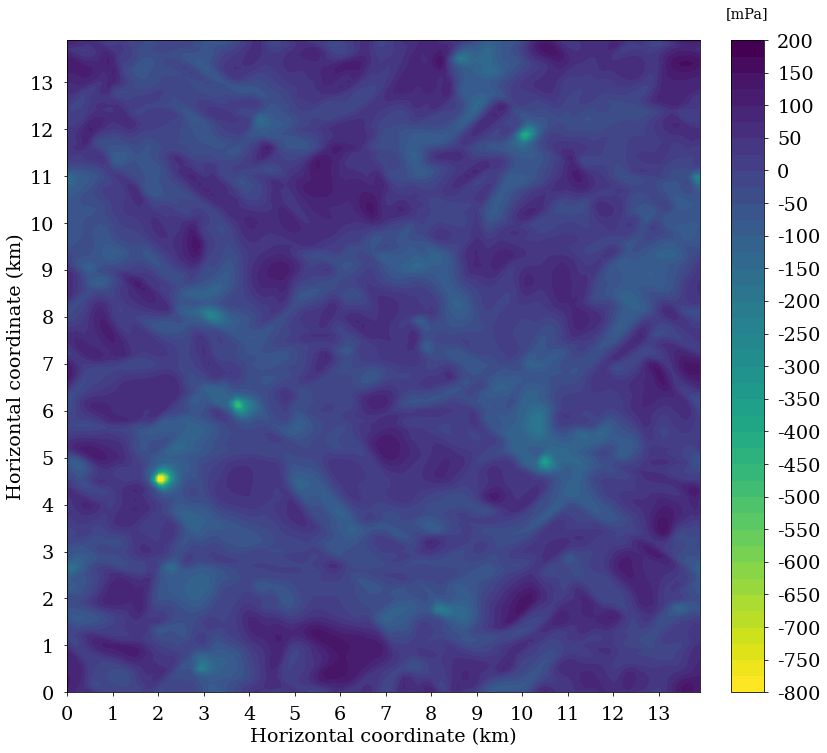

**** Saving file in png format... Please wait.


In [13]:
mp = pp() ; mp << hor ; mp.var = "PSFC" 
mp.get() ; mp = mp - np.mean(mp.f)
mp = mp*1000.
mp.colorbar = "viridis_r" 
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -800,+200,40,"%.0f","mPa"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.vmin) ; foo = mp.plot()

### PBL top

In [14]:
hor.z = 25

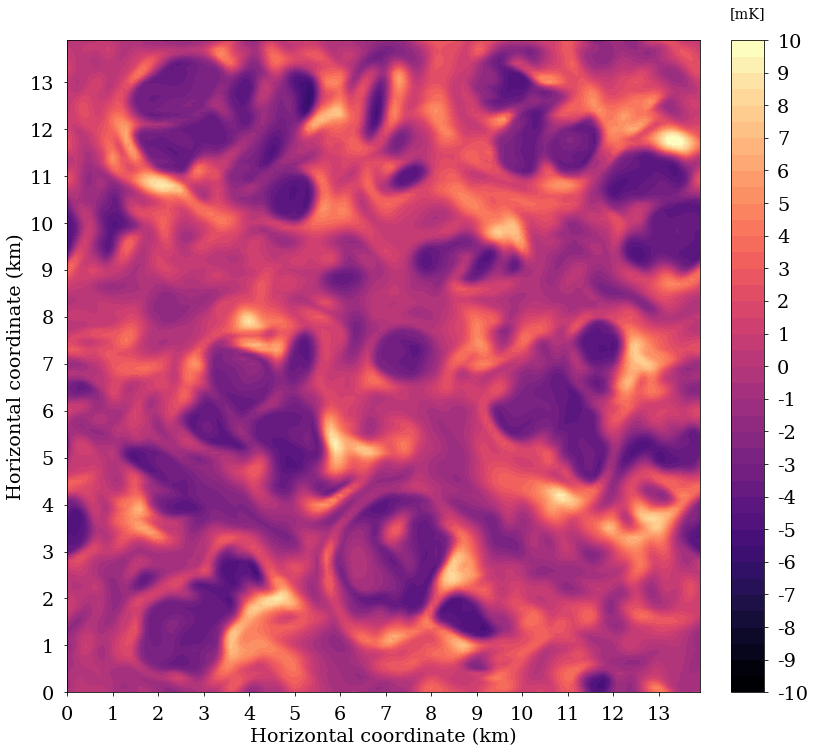

**** Saving file in png format... Please wait.


In [15]:
mp = pp() ; mp << hor ; mp.var = "T" 
mp.get() ; mp = mp - np.mean(mp.f)
mp = mp*1000.
mp.colorbar = "magma"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -10,+10,40,"%.0f","mK"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

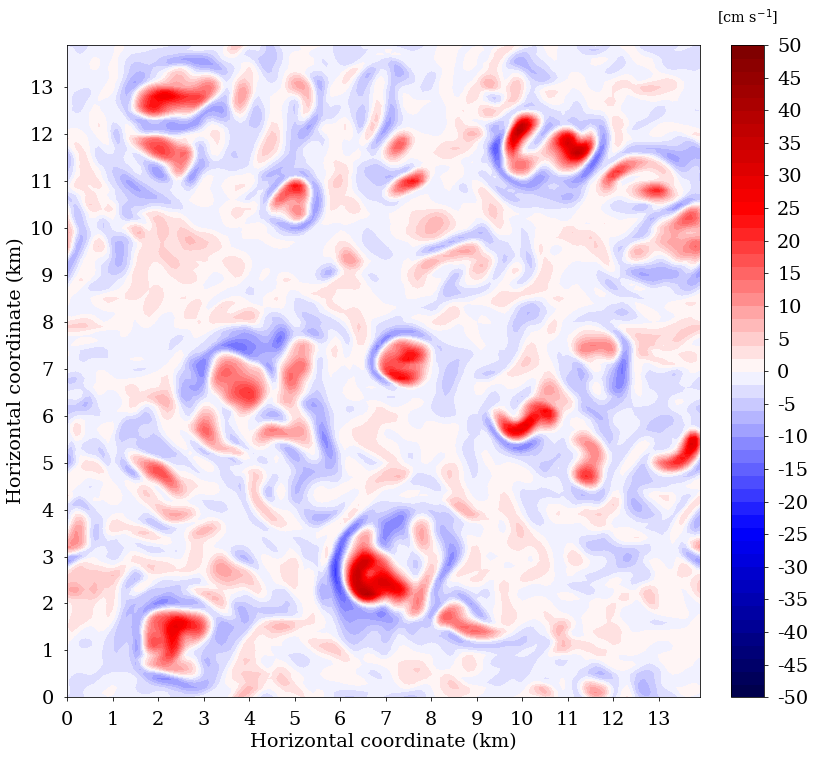

**** Saving file in png format... Please wait.


In [16]:
mp = pp() ; mp << hor ; mp.var = "W"
mp.get() ; mp = mp*100.
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -50,+50,50,"%.0f","cm s$^{-1}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

### PBL base

In [17]:
hor.z = 2

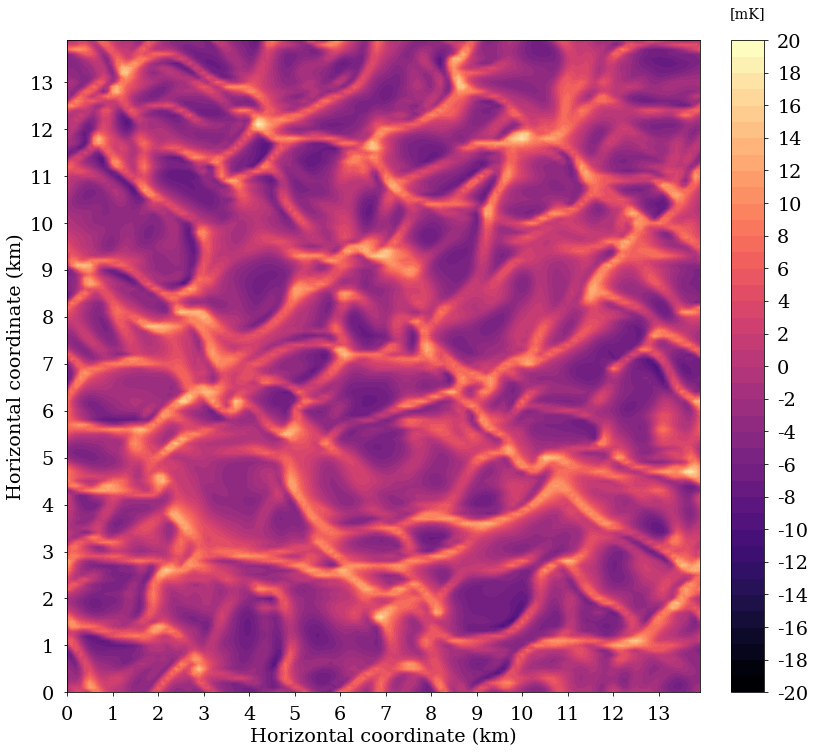

**** Saving file in png format... Please wait.


In [18]:
mp = pp() ; mp << hor ; mp.var = "T" 
mp.get() ; mp = mp - np.mean(mp.f)
mp = mp*1000.
mp.colorbar = "magma"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -20,+20,40,"%.0f","mK"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

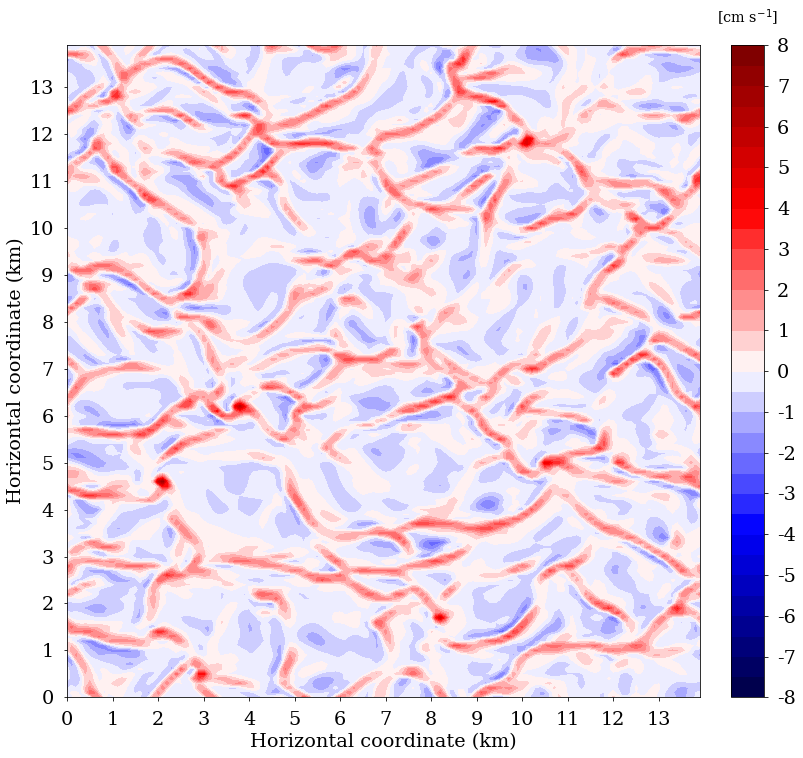

**** Saving file in png format... Please wait.


In [19]:
mp = pp() ; mp << hor ; mp.var = "W"
mp.get() ; mp = mp*100.
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -8,+8,32,"%.0f","cm s$^{-1}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

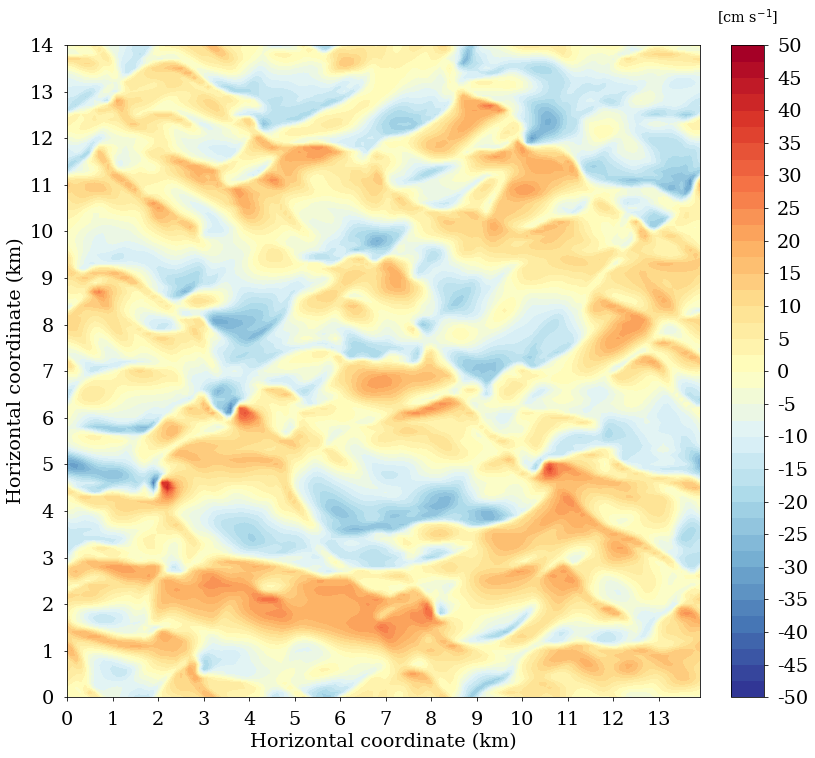

**** Saving file in png format... Please wait.


In [20]:
mp = pp() ; mp << hor ; mp.var = "V"
mp.get() ;  mp = mp*100.
mp.colorbar = "RdYlBu_r"
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -50,+50,40,"%.0f","cm s$^{-1}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+str(mp.z[0]) ; foo = mp.plot()

## Profile

In [21]:
cp = pp() ; cp << ini
cp.y = ind_dd
cp.xcoeff = dx/1000. ; cp.xlabel = "Horizontal coordinate (km)"
cp.xmin = 0 ; cp.xmax = 14 ; cp.nxticks = 15
cp.xp,cp.yp = 16,4
cp.marker = "s"
cp.fmt = "%.1f"
cp.filename = "coupe"

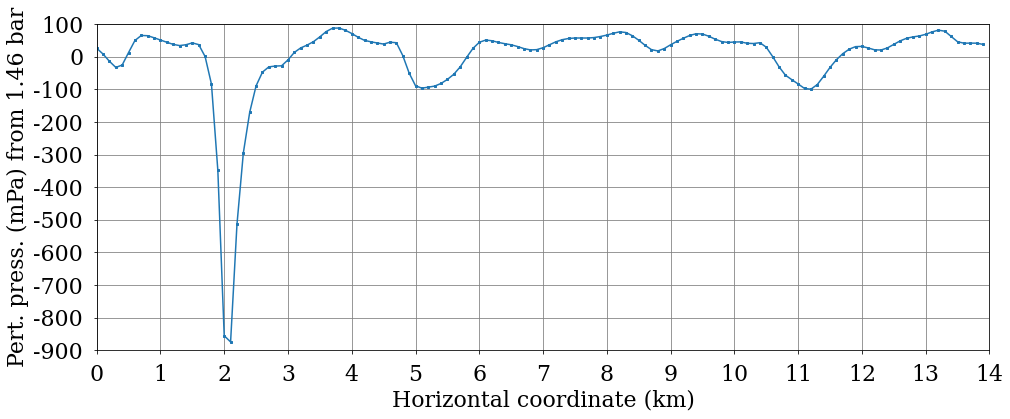

**** Saving file in png format... Please wait.


In [22]:
dp = pp() ; dp << cp ; dp.var = "PSFC"

dp.get()

fff = np.mean(dp.f)
dp = (dp - fff)*1000.
dp.ylabel = "Pert. press. (mPa) from %.2f bar" % (fff/1e5) 
dp.fmt = "%.0f"
dp.xp,dp.yp = 16,6

dp.ymin = -900 ; dp.ymax = 100

foo = dp.plot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()

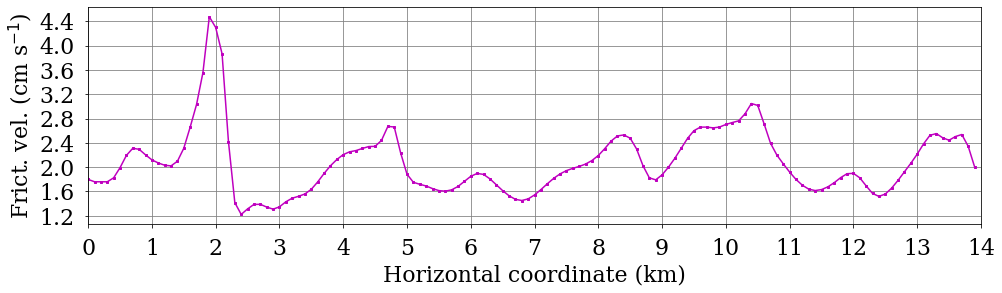

**** Saving file in png format... Please wait.


In [23]:
dp = pp() ; dp << cp ; dp.var = "USTM" ; dp.color = 'm'
foo = dp.get() ; dp = 100*dp ; dp.ylabel = "Frict. vel. (cm s$^{-1}$)"
dp.plot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()

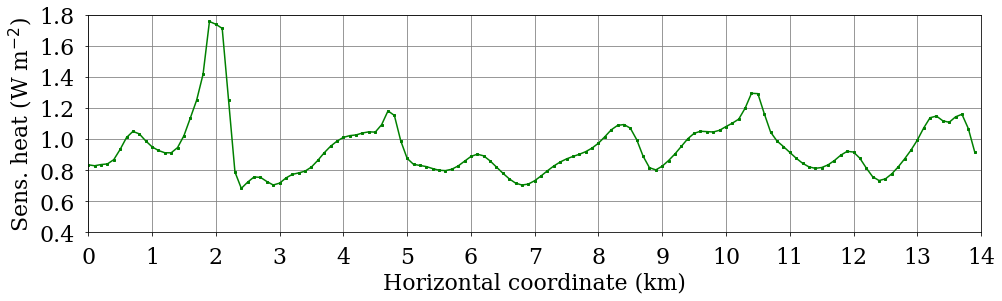

**** Saving file in png format... Please wait.


In [24]:
dp = pp() ; dp << cp ; dp.var = "HFX" ; dp.color = 'g'
dp.ylabel = "Sens. heat (W m$^{-2}$)"
dp.ymin = 0.4 ; dp.ymax = 1.8 ; dp.nyticks = 7
dp.getplot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()

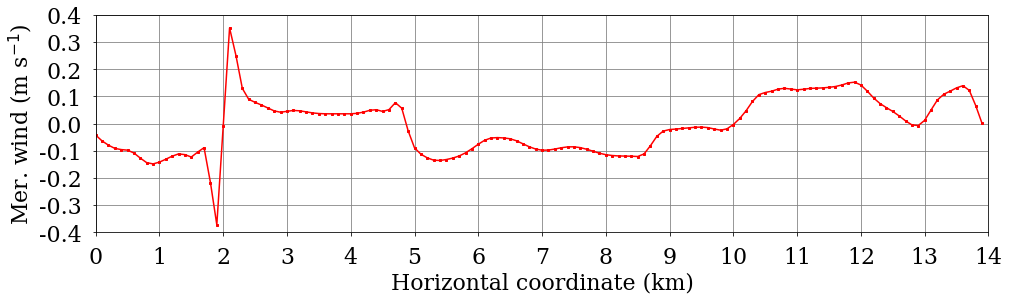

**** Saving file in png format... Please wait.


In [25]:
dp = pp() ; dp << cp ; dp.var = "V" ; dp.color = 'r'
dp.ylabel = "Mer. wind (m s$^{-1}$)"
###############
dp.z = 0 ; dp.y = dp.y+1 # stagger
###############
dp.ymin = -0.4 ; dp.ymax = 0.4 ; dp.nyticks = 8
foo = dp.getplot() ; dp.out = "png" ; dp.filename = dp.filename+dp.var[0] ; foo = dp.plot()

## surface diagnostics (time cumulatives)

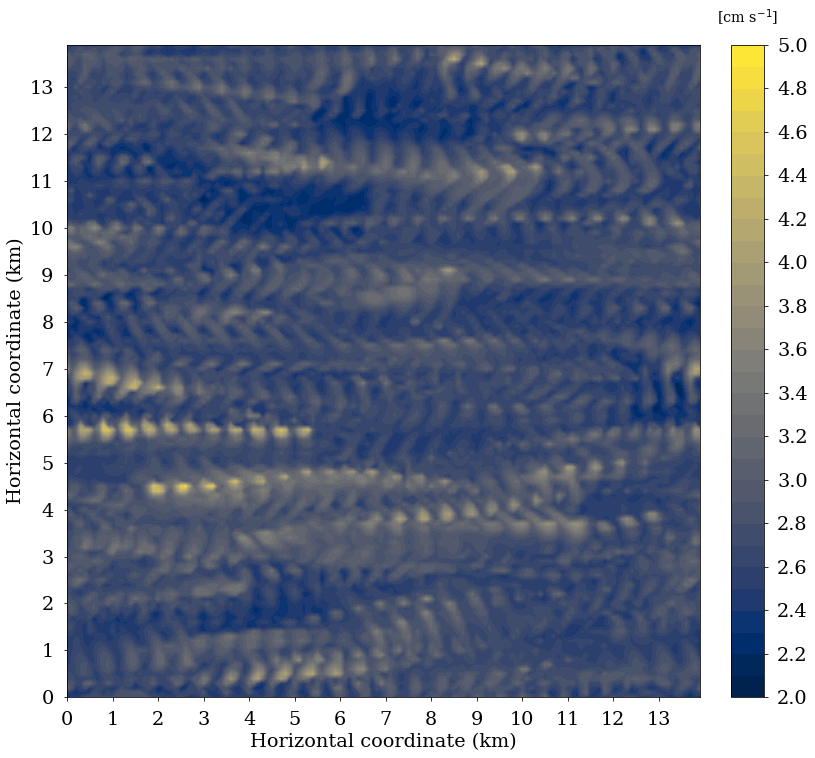

**** Saving file in png format... Please wait.


In [26]:
mp = pp() ; mp << hor ; mp.var = "USTM" 
mp.compute = "max" ; mp.t = time_interv
mp.get() 
mp = mp*100.
mp.colorbar = "cividis" 
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = 2,5,30,"%.1f","cm s$^{-1}$"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+"cumu" ; foo = mp.plot()

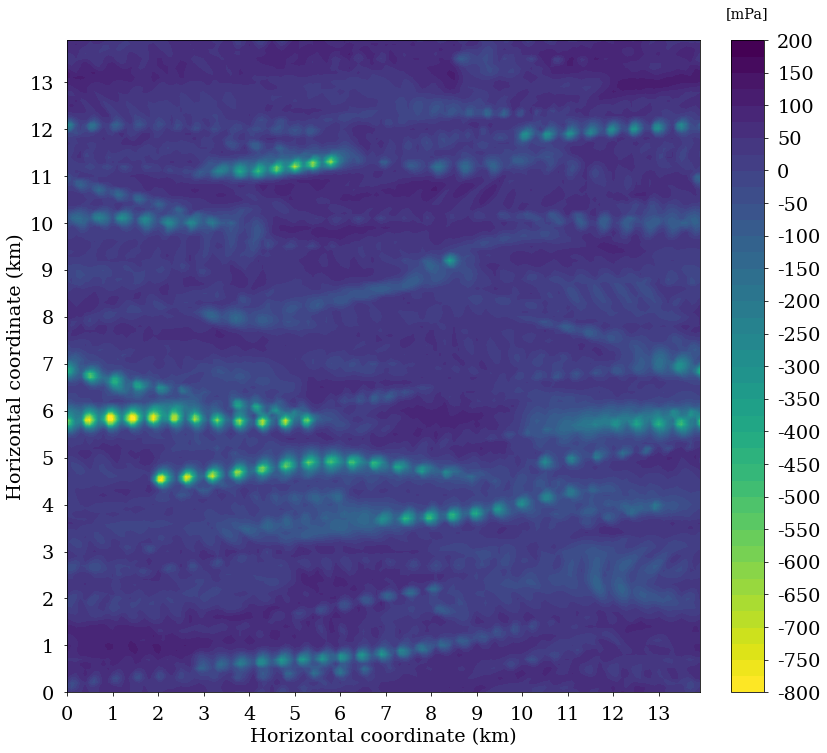

**** Saving file in png format... Please wait.


In [27]:
mp = pp() ; mp << hor ; mp.var = "PSFC" 
mp.compute = "min"
mp.t = time_interv
mp.get() ; mp = mp - np.mean(mp.f)
mp = mp*1000.
mp.colorbar = "viridis_r" 
mp.vmin,mp.vmax,mp.div,mp.fmt,mp.units = -800,+200,40,"%.0f","mPa"
foo = mp.plot() ; mp.out = "png" ; mp.filename = mp.filename+mp.var[0]+"cumu" ; foo = mp.plot()